In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Note:
There are lots of null values in the data set especially on the 'Total Condensate' and 'Light Condensate' columns. These two columns are excluded from the dataset. The remaining columns also contain some null values. ,all the rows containing null values are excluded.

Here, 'Heavy Condensate' and 'Water' columns used as an input feature 

In [9]:
df = pd.read_excel('E:\DATA\Kailastilla data\klt1 production1983-2010 chacned.xls',sheet_name=4)

In [10]:
df.head(50)

,Sylhet Gas Fields Limited,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,(A Company of Petrobangla),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kailashtilla Field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Daily Production Analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Well no. #,KTL -5,NaN,NaN,Month: September 2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Date,Gas,Flowing Pressure,Liquid Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,Heavy Condensate,Light Condensate,Total Condensate,Water,NaN,NaN,NaN,NaN,NaN
6,NaN,MMSCF,PSIG,LITER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2006-09-01 00:00:00,0,-,0,NaN,NaN,0,NaN,0.000,NaN,NaN,NaN
8,2006-09-02 00:00:00,0,-,0,NaN,NaN,0,NaN,0.000,NaN,NaN,NaN
9,2006-09-03 00:00:00,0,-,0,NaN,NaN,0,NaN,0.000,NaN,NaN,NaN


In [12]:
df = df.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'],axis=1)

In [14]:
df.columns = ['Date','Gas(MMscf)','Flowing Pressure(psig)','Heavy Condensate(L)','Light Condensate(L)',
              'Total Condensate(L)','Water(L)']

In [17]:
df = df.drop([0,1,2,3,4,5,6])

In [18]:
df.head()

,Date,Gas(MMscf),Flowing Pressure(psig),Heavy Condensate(L),Light Condensate(L),Total Condensate(L),Water(L)
7,2006-09-01 00:00:00,0,-,0,NaN,NaN,0
8,2006-09-02 00:00:00,0,-,0,NaN,NaN,0
9,2006-09-03 00:00:00,0,-,0,NaN,NaN,0
10,2006-09-04 00:00:00,0,-,0,NaN,NaN,0
11,2006-09-05 00:00:00,0,-,0,NaN,NaN,0


In [21]:
#df.to_csv('KTL-5.csv',index=False)

In [22]:
df.describe()

,Date,Gas(MMscf),Flowing Pressure(psig),Heavy Condensate(L),Light Condensate(L),Total Condensate(L),Water(L)
count,2097,1567,1464,1538,1167,1119,1465
unique,1593,668,258,791,532,816,391
top,Minimum =,0,2980,0,0,0,0
freq,52,387,201,393,185,175,387


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2476 entries, 7 to 2482
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    1583 non-null   object
 1   Gas(MMscf)              1567 non-null   object
 2   Flowing Pressure(psig)  1464 non-null   object
 3   Heavy Condensate(L)     1538 non-null   object
 4   Light Condensate(L)     1167 non-null   object
 5   Total Condensate(L)     1119 non-null   object
 6   Water(L)                1465 non-null   object
dtypes: object(7)
memory usage: 154.8+ KB


In [38]:
#df.head(50)

In [40]:
import datetime

for row in range(len(df['Date'])):
    if isinstance(df['Date'].iloc[row], datetime.datetime):
        continue
    else:
        df.iloc[row] = np.nan

In [48]:
#df.head(50)

In [46]:
df.dropna(how='all',inplace=True)

In [49]:
df.isnull().sum()

Date                        0
Gas(MMscf)                365
Flowing Pressure(psig)    365
Heavy Condensate(L)       394
Light Condensate(L)       703
Total Condensate(L)       700
Water(L)                  365
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1583 entries, 7 to 2303
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    1583 non-null   object
 1   Gas(MMscf)              1218 non-null   object
 2   Flowing Pressure(psig)  1218 non-null   object
 3   Heavy Condensate(L)     1189 non-null   object
 4   Light Condensate(L)     880 non-null    object
 5   Total Condensate(L)     883 non-null    object
 6   Water(L)                1218 non-null   object
dtypes: object(7)
memory usage: 98.9+ KB


<AxesSubplot:>

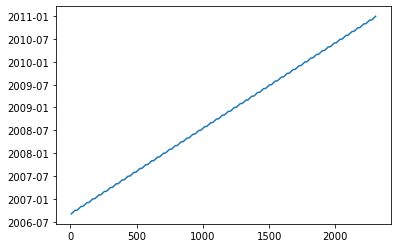

In [51]:
df['Date'].plot()

<AxesSubplot:>

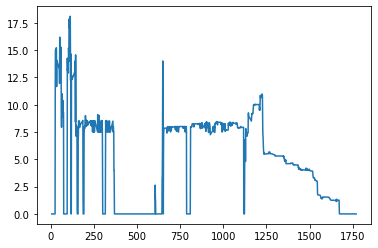

In [52]:
df['Gas(MMscf)'].plot()

In [65]:
#df['Flowing Pressure(psig)'].astype(float)

In [69]:
for row in range(len(df['Flowing Pressure(psig)'])):
    if (df['Flowing Pressure(psig)'].iloc[row] == '-'):
        df['Flowing Pressure(psig)'].iloc[row] = np.nan

<AxesSubplot:>

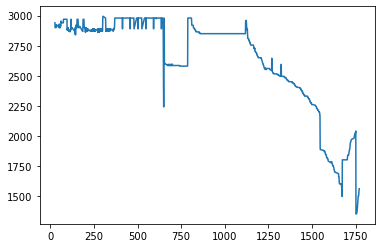

In [70]:
df['Flowing Pressure(psig)'].plot()

<AxesSubplot:>

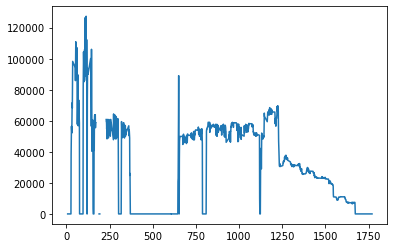

In [144]:
df['Heavy Condensate(L)'].plot()

<AxesSubplot:>

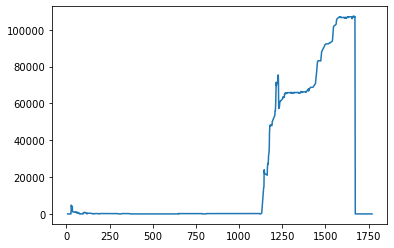

In [145]:
df['Water(L)'].plot()

In [73]:
df.isnull().sum()

Date                        0
Gas(MMscf)                365
Flowing Pressure(psig)    385
Heavy Condensate(L)       394
Light Condensate(L)       703
Total Condensate(L)       700
Water(L)                  365
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1583 entries, 7 to 2303
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    1583 non-null   object
 1   Gas(MMscf)              1218 non-null   object
 2   Flowing Pressure(psig)  1198 non-null   object
 3   Heavy Condensate(L)     1189 non-null   object
 4   Light Condensate(L)     880 non-null    object
 5   Total Condensate(L)     883 non-null    object
 6   Water(L)                1218 non-null   object
dtypes: object(7)
memory usage: 98.9+ KB


In [76]:
df1 = df.drop(['Light Condensate(L)','Total Condensate(L)'],axis=1)

In [78]:
df1 = df1.dropna()

In [79]:
df1.head()

,Date,Gas(MMscf),Flowing Pressure(psig),Heavy Condensate(L),Water(L)
27,2006-09-21 00:00:00,11.25,2941,38265,3498
28,2006-09-22 00:00:00,15.0121,2900,50645,4770
29,2006-09-23 00:00:00,15.035,2900,56420,3975
30,2006-09-24 00:00:00,15.0231,2900,54285,4290
31,2006-09-25 00:00:00,15.0329,2900,52100,4300


In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 27 to 1770
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    1169 non-null   object
 1   Gas(MMscf)              1169 non-null   object
 2   Flowing Pressure(psig)  1169 non-null   object
 3   Heavy Condensate(L)     1169 non-null   object
 4   Water(L)                1169 non-null   object
dtypes: object(5)
memory usage: 54.8+ KB


In [111]:
X = df1.drop(['Date','Gas(MMscf)'],axis=1).values

In [112]:
y = df1['Gas(MMscf)'].values

In [115]:
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [116]:
X.shape

(1169, 3)

In [117]:
y.shape

(1169,)

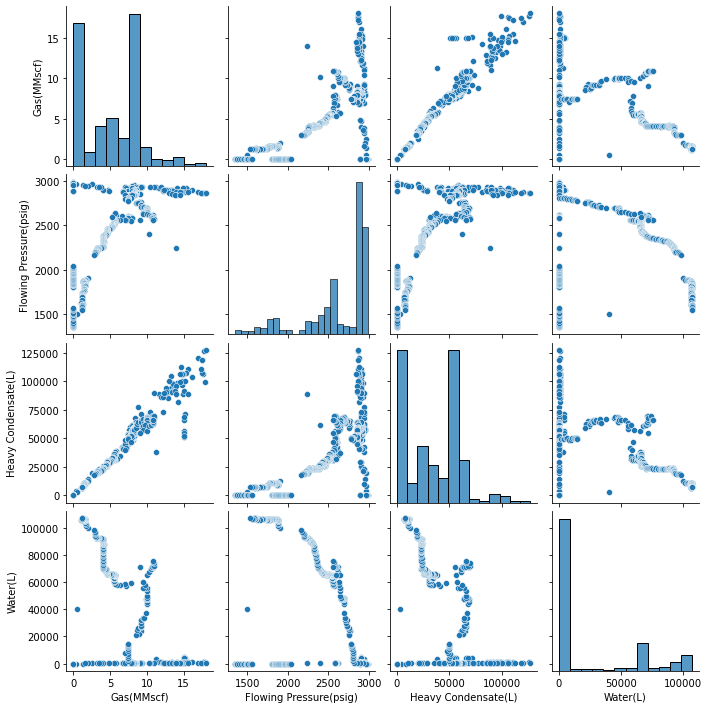

In [92]:
sns.pairplot(df1)

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Scaling

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
scaler = MinMaxScaler()

In [121]:
X_train = scaler.fit_transform(X_train)

In [122]:
X_test = scaler.transform(X_test)

## Creating Model

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [134]:
model = Sequential()

model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(1))

In [135]:
model.compile(optimizer='adam', loss='mse')

In [136]:
model.fit(x=X_train, y=y_train,validation_data=(X_test,y_test), epochs=80)

Epoch 1/80
33/33 [==============================] - 1s 10ms/step - loss: 37.4135 - val_loss: 33.5561
Epoch 2/80
33/33 [==============================] - 0s 3ms/step - loss: 32.9733 - val_loss: 28.9321
Epoch 3/80
33/33 [==============================] - 0s 4ms/step - loss: 27.4272 - val_loss: 23.0015
Epoch 4/80
33/33 [==============================] - 0s 4ms/step - loss: 20.9126 - val_loss: 17.6952
Epoch 5/80
33/33 [==============================] - 0s 3ms/step - loss: 16.1191 - val_loss: 14.7322
Epoch 6/80
33/33 [==============================] - 0s 4ms/step - loss: 13.9328 - val_loss: 13.7632
Epoch 7/80
33/33 [==============================] - 0s 3ms/step - loss: 13.0875 - val_loss: 13.0837
Epoch 8/80
33/33 [==============================] - 0s 3ms/step - loss: 12.4024 - val_loss: 12.3615
Epoch 9/80
33/33 [==============================] - 0s 3ms/step - loss: 11.5528 - val_loss: 11.1923
Epoch 10/80
33/33 [==============================] - 0s 4ms/step - loss: 10.1588 - val_loss: 9.6273

In [137]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

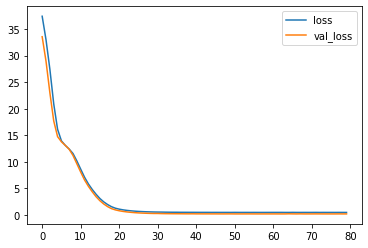

In [138]:
loss.plot()

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [139]:
predictions = model.predict(X_test)

In [140]:
mean_absolute_error(y_test,predictions)

0.27604595

In [141]:
explained_variance_score(y_test,predictions)

0.9897401928901672

Text(0.5, 1.0, 'KTL-5')

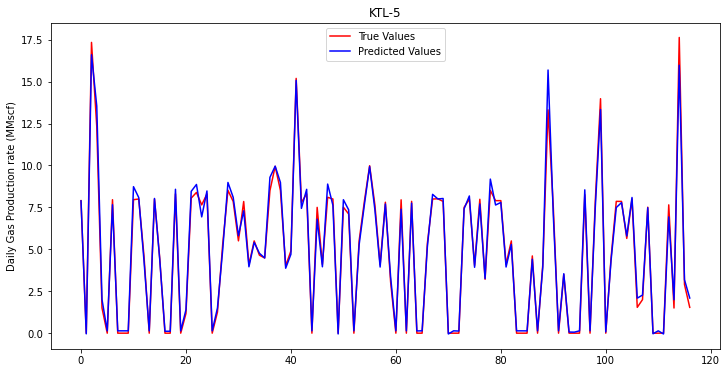

In [142]:
plt.figure(figsize=(12,6))
plt.plot(y_test, color='r',label='True Values')
plt.plot(predictions,color='b',label='Predicted Values')
plt.legend()
plt.ylabel('Daily Gas Production rate (MMscf)')
plt.title('KTL-5')

### Now we're going to take 1st 70% of the data for training the model and use the bottom 30% data for testing.

In [149]:
df1.head()

,Date,Gas(MMscf),Flowing Pressure(psig),Heavy Condensate(L),Water(L)
27,2006-09-21 00:00:00,11.25,2941,38265,3498
28,2006-09-22 00:00:00,15.0121,2900,50645,4770
29,2006-09-23 00:00:00,15.035,2900,56420,3975
30,2006-09-24 00:00:00,15.0231,2900,54285,4290
31,2006-09-25 00:00:00,15.0329,2900,52100,4300


<AxesSubplot:>

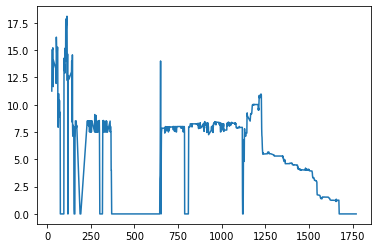

In [150]:
df1['Gas(MMscf)'].plot()

In [154]:
len(df1['Gas(MMscf)'])

1169

In [155]:
1169*.3

350.7

In [157]:
ind = 1169 - 350

In [158]:
ind

819

In [209]:
X = df1.drop(['Date','Gas(MMscf)'],axis=1)

In [210]:
y = df1['Gas(MMscf)']

In [211]:
X = X.astype(float)
y = y.astype(float)

In [212]:
X_train = X.iloc[:ind].values

In [213]:
X_train.shape

(819, 3)

In [214]:
X_test = X.iloc[ind:].values

In [215]:
X_test.shape

(350, 3)

In [216]:
y_train = y.iloc[:ind].values
y_test = y.iloc[ind:].values

In [217]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [271]:
X_train

array([[0.92847682, 0.30052306, 0.04633113],
       [0.87417219, 0.39775226, 0.06317881],
       [0.87417219, 0.44310756, 0.05264901],
       ...,
       [0.41059603, 0.2836768 , 0.86013245],
       [0.41059603, 0.28218459, 0.86238411],
       [0.41059603, 0.28469779, 0.86384106]])

In [272]:
from tensorflow.keras.callbacks import EarlyStopping

In [253]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=2)

In [268]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [269]:
model.fit(x=X_train, y=y_train,validation_data=(X_test,y_test), epochs=30)

Epoch 1/30
26/26 [==============================] - 1s 12ms/step - loss: 56.7473 - val_loss: 9.7568
Epoch 2/30
26/26 [==============================] - 0s 6ms/step - loss: 54.9080 - val_loss: 8.2596
Epoch 3/30
26/26 [==============================] - 0s 7ms/step - loss: 52.3949 - val_loss: 6.5265
Epoch 4/30
26/26 [==============================] - 0s 8ms/step - loss: 48.5877 - val_loss: 4.6455
Epoch 5/30
26/26 [==============================] - 0s 8ms/step - loss: 43.2242 - val_loss: 4.1742
Epoch 6/30
26/26 [==============================] - 0s 5ms/step - loss: 36.5261 - val_loss: 8.1886
Epoch 7/30
26/26 [==============================] - 0s 5ms/step - loss: 28.5635 - val_loss: 20.5565
Epoch 8/30
26/26 [==============================] - 0s 5ms/step - loss: 19.9153 - val_loss: 41.9023
Epoch 9/30
26/26 [==============================] - 0s 5ms/step - loss: 13.9836 - val_loss: 57.0476
Epoch 10/30
26/26 [==============================] - 0s 5ms/step - loss: 11.5122 - val_loss: 52.5343
Epoc

<AxesSubplot:>

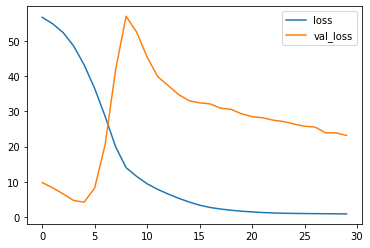

In [270]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [262]:
predictions = model.predict(X_test)

In [263]:
mean_absolute_error(y_test,predictions)

1.2554334708994384

In [264]:
explained_variance_score(y_test,predictions)

0.9511467524205167

Text(0.5, 1.0, 'KTL-5')

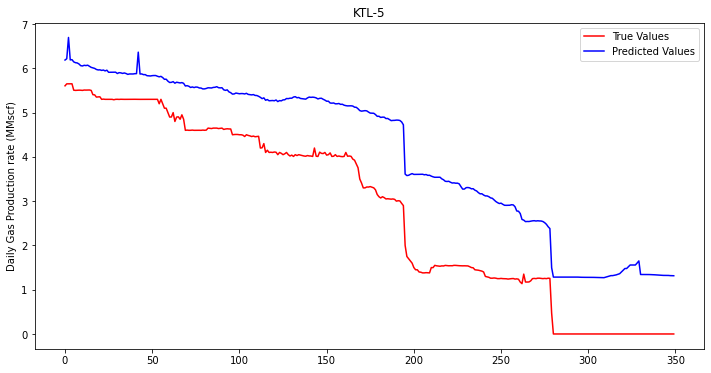

In [265]:
plt.figure(figsize=(12,6))
plt.plot(y_test, color='r',label='True Values')
plt.plot(predictions,color='b',label='Predicted Values')
plt.legend()
plt.ylabel('Daily Gas Production rate (MMscf)')
plt.title('KTL-5')

Text(0.5, 1.0, 'KTL-5')

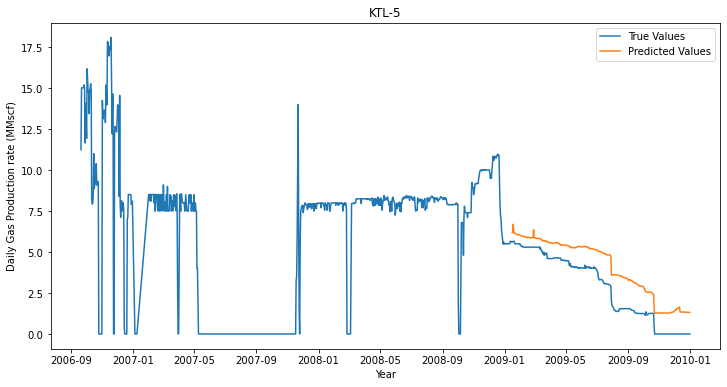

In [266]:
plt.figure(figsize=(12,6))
plt.plot(df1['Date'],y,label='True Values')
plt.plot(df1['Date'].iloc[ind:],predictions,label='Predicted Values')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Daily Gas Production rate (MMscf)')
plt.title('KTL-5')